In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo

import os
import os.path as path
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')

!rm Data/Minimos.dat

file = 'Data/Minimos.dat'


#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Exponencial.dat'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..................................................................................] 521 / 521File loaded


In [3]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]
N = len(x)

sigma = np.random.normal(loc=0,scale=10,size=N)
sigma = np.abs(sigma)
print(sigma)

[24.17696469 21.80063109  9.59963019  8.95215575  1.16110204 11.90389044
  1.07771908 14.61169024 20.62106301  7.50513157 18.53891388  4.35694683
  2.93884717  0.03420968 10.70954828  1.12719552  8.3653453   3.77329618
  5.8515591   7.13807831]


<ErrorbarContainer object of 3 artists>

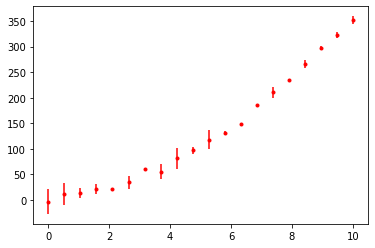

In [4]:
plt.errorbar(x,y,yerr=sigma,fmt='.',color='r')

In [5]:
# Definimos el modelo con sus parametros
def GetModel1(x,p):
    
    y = 0.
    for n in range(len(p)):
        y += p[n]*x**n
    
    return y

In [34]:
def GetModel2(x,p):
    
    A,B = p
    C  = 0.
    return A*np.exp(B*x)+C

In [35]:
def Chi2(p,x,y,sigma,Model):
    return np.sum( ( ( y - Model(x,p) )/sigma )**2  + np.log(sigma) ) 

In [36]:
#primer modelo
p0 = np.ones(3)
nll = lambda *p: Chi2(*p)

In [37]:
result = spo.minimize( nll, p0, args=(x,y,sigma,GetModel1), options={"disp":True},method='Nelder-mead')

Optimization terminated successfully.
         Current function value: 154.717776
         Iterations: 157
         Function evaluations: 292


In [38]:
if result.success:
    print('Success!')
    print(f"x={result.x} y = {result.fun}")
else:
    print('could not find a minimum')
    print(f"x={result.x} y = {result.fun}")

Success!
x=[-6.28075037 11.0942594   2.46815952] y = 154.71777572661574


In [39]:
param = result.x

In [40]:
ObsChi2 = Chi2(param,x,y,sigma,GetModel1)
ObsChi2

154.71777572661574

In [41]:
def Chi2Reducido(p,Model):
    return Chi2(p,x,y,sigma,Model)/(N-len(p))

In [42]:
Chi2R = Chi2Reducido(param,GetModel1)
Chi2R

9.101045630977396

In [43]:
#segundo modelo
p0 = np.ones(2)
nll = lambda *p: Chi2(*p)
result1 = spo.minimize( nll, p0, args=(x,y,sigma,GetModel2), options={"disp":True})

         Current function value: 1220.118750
         Iterations: 130
         Function evaluations: 636
         Gradient evaluations: 208


In [44]:
param1 = result1.x
ObsChi2 = Chi2(param1,x,y,sigma,GetModel2)
ObsChi2

1220.1187504820155

In [45]:
Chi2RE = Chi2Reducido(param1,GetModel2)
Chi2RE

67.78437502677863

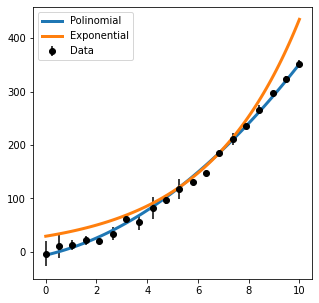

In [46]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')

t = np.linspace(np.min(x),np.max(x),100)
ax.plot(t,GetModel1(t,param),lw=3,label='Polinomial')
ax.plot(t,GetModel2(t,param1),lw=3,label='Exponential')
ax.legend()

In [47]:
#df = N - len(param)
#df

In [20]:
#CriChi2 = chi2.ppf(0.975,df=df)
#print(CriChi2)

In [21]:
#_x = np.linspace(0,100,100)
#_y = chi2.pdf(_x,df=df)
#plt.plot(_x,_y)

#plt.axvline(x=CriChi2,color='r')
#plt.axvline(x=ObsChi2,color='k')

In [22]:
Chi2V = []
npfit = []

nparams = 15

for i in range(2,nparams):
    
    p0 = np.ones(i)
    result = spo.minimize( nll, p0, args=(x,y,sigma,GetModel1), options={"disp":True},method='Nelder-Mead')
    
    if result.success:
        
    
        param = result.x
    
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.errorbar(x,y,yerr=sigma,fmt='o',color='r',label='Data')

        t = np.linspace(np.min(x),np.max(x),100)
        ax.plot(t,GetModel1(t,param),lw=3,label='Polinomio_{}'.format(i))
        ax.legend()
    
        plt.savefig('Ajuste_%.0f.jpg' %(i))
        plt.close()
    
        Chi2V.append( Chi2Reducido(param,GetModel1) )
        npfit.append(i)

Optimization terminated successfully.
         Current function value: 510.174045
         Iterations: 95
         Function evaluations: 177
Optimization terminated successfully.
         Current function value: 154.717776
         Iterations: 157
         Function evaluations: 292
Optimization terminated successfully.
         Current function value: 631.705683
         Iterations: 269
         Function evaluations: 472
Optimization terminated successfully.
         Current function value: 233.063421
         Iterations: 523
         Function evaluations: 856
Optimization terminated successfully.
         Current function value: 311.259965
         Iterations: 366
         Function evaluations: 631
Optimization terminated successfully.
         Current function value: 887.511264
         Iterations: 704
         Function evaluations: 1115
Optimization terminated successfully.
         Current function value: 46426.040999
         Iterations: 964
         Function evaluations: 1508
Opt

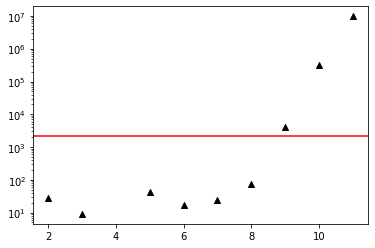

In [23]:
plt.scatter(npfit,np.array(Chi2V),color='k',marker='^')
plt.axhline(y=Chi2RE,color='r')
plt.yscale('log')

In [24]:
Chi2V

[28.34300248158422,
 9.101045630977396,
 42.11371218250284,
 16.647387233562277,
 23.94307424581569,
 73.95927201011577,
 4220.549181725185,
 328317.8608209341,
 9818377.620531749]

In [25]:
Chi2RE

2124.5837548283794